I will go over breast cancer dataset and apply PCA algorithm to narrow the dataset.

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

we read the breast cancer dataset available on scikit-learn:

In [16]:
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

In [17]:
print("Features {}".format(X.shape))
print("Target {}".format(y.shape))

Features (569, 30)
Target (569,)


In [18]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

We create a random forest classifier. The dataset is splitted into training and test subsets using train_test_split function. Then we train the classifier using training set. 

In [20]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4)
#Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
clf.score(X_train, y_train)

0.9953051643192489

In [22]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.958041958041958

apply PCA 

In [23]:
#Read the data
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)
#Normalize
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
#Apply PCA 
pca = PCA(n_components = 2).fit(X_normalized)
pca_X = pca.transform(X_normalized)

Now we have 2 features instead of 30.

In [24]:
pca_X.shape

(569, 2)

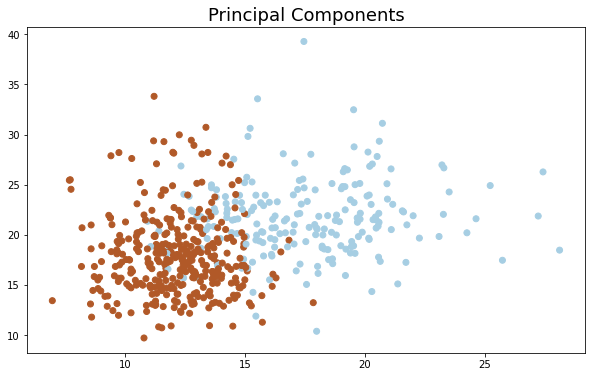

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Principal Components", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

TSNE

In [27]:
df_table=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(df_table)
print(standardized_data.shape)

(569, 30)


In [31]:
df_tbl_target=pd.DataFrame(cancer['target'])
df_tbl_target['target']=pd.DataFrame(cancer['target'])
# Delete a column by column number
# Delete column number 0 (index number 0 in data.columns)
df_tbl_target = df_tbl_target.drop(columns=df_tbl_target.columns[0])

In [32]:
def Implement_TSNE(n, df,target):
  from sklearn.manifold import TSNE
  model = TSNE(n_components = n, random_state = 42,verbose=0, perplexity=40, n_iter=400)
  tsne_data = model.fit_transform(df)
  print(tsne_data.shape)
  tsne_data = np.vstack((tsne_data.T, target)).T 
  return tsne_data

In [33]:

tsne_df_2 = Implement_TSNE(2, standardized_data,df_tbl_target['target'])
tsne_df_2 = pd.DataFrame(data = tsne_df_2, columns = ("Dim_1", "Dim_2", "label")) 
tsne_df_2

(569, 2)


,Dim_1,Dim_2,label
0,-10.990579,17.939388,0.0
1,-1.647387,15.305823,0.0
2,-7.373178,17.707848,0.0
3,-14.194951,10.480234,0.0
4,-0.378321,18.565407,0.0
...,...,...,...
564,-5.669053,21.525757,0.0
565,-2.060107,20.587854,0.0
566,0.326482,12.146482,0.0
567,-9.882661,18.926790,0.0


In [34]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
        x = tsne_df_2.iloc[:,0],
        y = tsne_df_2.iloc[:,1],
        mode='markers',
        marker=dict(
            size=10,
            color=tsne_df_2.iloc[:,2], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark'
    
fig.show()

SVD

In [35]:
u, s, v = np.linalg.svd(standardized_data, full_matrices=True)

In [37]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained

array([0.443, 0.19 , 0.094, 0.066, 0.055, 0.04 , 0.023, 0.016, 0.014,
       0.012, 0.01 , 0.009, 0.008, 0.005, 0.003, 0.003, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   ])

In [38]:
row1=list(range(1,len(variance_explained)+1))

In [39]:

fig = go.Figure(data=[go.Bar(
    x=row1,
    y=variance_explained)
])
  
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     step="day",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
fig.layout.template = 'plotly_dark' 
fig.show()

ISOMAP

In [40]:
from sklearn.manifold import Isomap

def Implement_ISOMAP(n, df,target):
  model = Isomap(n_components=n)
  isomap_df=model.fit_transform(df)
  isomap_df.shape
  col_labels= ['Component'+str(i) for i in range(1,n+1)]
  isomap_df  = pd.DataFrame(isomap_df[:,0:n], index=target.tolist(), columns=col_labels)
  isomap_df=isomap_df.reset_index()
  isomap_df.rename(columns={'index':'Label'}, inplace=True)
  return isomap_df

In [41]:
isomap_df_2 = Implement_ISOMAP(2,standardized_data,df_tbl_target['target'])
isomap_df_2


,Label,Component1,Component2
0,0,18.686317,-1.112162
1,0,7.618309,-4.432485
2,0,12.750257,-2.867353
3,0,10.646481,16.521931
4,0,8.516967,-5.098407
...,...,...,...
564,0,13.437204,-4.099471
565,0,9.542582,-6.441341
566,0,1.746194,-3.640382
567,0,17.249824,1.370319


In [42]:
isomap_df_3 = Implement_ISOMAP(3,standardized_data,df_tbl_target['target'])
isomap_df_3

,Label,Component1,Component2,Component3
0,0,18.686317,-1.112162,-2.763330
1,0,7.618309,-4.432485,-2.057245
2,0,12.750257,-2.867353,-0.263168
3,0,10.646481,16.521931,-3.527657
4,0,8.516967,-5.098407,2.937676
...,...,...,...,...
564,0,13.437204,-4.099471,6.362498
565,0,9.542582,-6.441341,4.014569
566,0,1.746194,-3.640382,0.022003
567,0,17.249824,1.370319,-3.652856


In [44]:

fig = go.Figure(data=go.Scatter(
        x = isomap_df_2.iloc[:,1],
        y = isomap_df_2.iloc[:,2],
        mode='markers',
        marker=dict(
            size=10,
            color=isomap_df_2.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

In [45]:
fig = go.Figure(data=[go.Scatter3d(
        x=isomap_df_3.iloc[:,1],
        y=isomap_df_3.iloc[:,2],
        z=isomap_df_3.iloc[:,3],
        mode='markers',
        marker=dict(
            size=5,
            color=isomap_df_3.iloc[:,0],    # set color to label
            colorscale='Viridis',         # choose a colorscale
            opacity=1,
            showscale=True,
            line_width=1
        )
    )])
  # figure layout
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1000,height=500)
fig.layout.template = 'plotly_dark' 
    
fig.show()

UMAP

In [46]:
!pip install umap
!pip install umap-learn
!pip install --upgrade tbb

import umap.umap_ as umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=a4b56b5ff5e07162602b28f349522c3beb56c06da387582096d97af493d8e770
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 16.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=72585b30d02f6e62cec666fc49b65dfd57ea17843f6197e9f29b53a8aa30327e
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=e91c4cca587b2cb81ff11490feef4d963f4ec453425a34d19ddb65f9400ba4d4
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |██████████████████████████████

In [47]:
def Implement_UMAP(n,df, target):
  umap_op = umap.UMAP(n_components=n)
  umap_df = umap_op.fit_transform(df)
  col_labels= ['Component'+str(i) for i in range(1,n+1)]
  umap_df  = pd.DataFrame(umap_df[:,0:n], index=target.tolist(), columns=col_labels)
  umap_df=umap_df.reset_index()
  umap_df.rename(columns={'index':'Label'}, inplace=True)
  return umap_df

In [49]:
umap_Idf = Implement_UMAP(2,standardized_data,df_tbl_target['target'])
umap_Idf

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



,Label,Component1,Component2
0,0,4.900235,8.720596
1,0,6.750665,9.069983
2,0,5.342374,8.764308
3,0,5.668715,6.600567
4,0,6.489051,9.858657
...,...,...,...
564,0,5.274470,9.659217
565,0,6.135742,9.935780
566,0,9.184134,7.985209
567,0,4.782347,8.921370


In [52]:

fig = go.Figure(data=go.Scatter(
        x = umap_Idf.iloc[:,1],
        y = umap_Idf.iloc[:,2],
        mode='markers',
        marker=dict(
            size=10,
            color=umap_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

LLE

In [53]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

def Implement_LLE(n, df, target):
  lle_op = LLE(n_components=n)
  lle_df = lle_op.fit_transform(df)
  col_labels= ['Component'+str(i) for i in range(1,n+1)]
  lle_df  = pd.DataFrame(lle_df[:,0:n], index=target.tolist(), columns=col_labels)
  lle_df= lle_df.reset_index()
  lle_df.rename(columns={'index':'Label'}, inplace=True)
  return lle_df

In [54]:
lle_Idf = Implement_LLE(2,standardized_data,df_tbl_target['target'])
lle_Idf

,Label,Component1,Component2
0,0,-0.057661,0.023879
1,0,-0.089942,-0.030223
2,0,-0.073981,-0.001860
3,0,-0.009929,0.073946
4,0,-0.084554,-0.028872
...,...,...,...
564,0,-0.080931,-0.027866
565,0,-0.080314,-0.029884
566,0,-0.008978,-0.015055
567,0,-0.053726,0.032310


In [55]:
fig = go.Figure(data=go.Scatter(
        x = lle_Idf.iloc[:,1],
        y = lle_Idf.iloc[:,2],
        mode='markers',
        marker=dict(
            size=10,
            color=lle_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()